In [1]:
# day4
# 범주형 변수(male(0)/female(1), 10(0) / 20대(1),,, / 80대,,, A/B/C/D/E) -> 
# 이항 변수화
# 연속형 VS 범주형 변수 
# => 20,30대 : 범주형 변수
# 이항 변수화(성별: 0 =>10, 1 => 01)
# 0 or 1이므로 string 이 2자인 변수 만들어 
# (연령대 : 10대(0) => 10000000, 20대(1) => 01000000,....)
# 이항변수화 함수 : OneHotEncoder()
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


In [2]:
# [성별(1/0), 연령대(0/1/2), 성적(0/1/2/3/4)] data
# 1: 남성. 0: 여성
data=np.array([[0,1,1], # [여성, 30대, B학점]
               [0,2,2], # [여성, 40대, C학점]
               [1,0,3], # [남성, 20대, D학점]
               [1,1,4], # [남성, 30대, E학점]
               [0,0,0], # [여성, 20대, A학점]
              ])
data
# feature에 집중
# data str에 집중

array([[0, 1, 1],
       [0, 2, 2],
       [1, 0, 3],
       [1, 1, 4],
       [0, 0, 0]])

In [3]:
ohe = OneHotEncoder() # 객체 생성 => 붕어빵 생성
ohe.fit(data) # fit: 무언가를 맞추는 것 => 알아서 OHE를 해줌
# data변수에 저장된 데이터에 맞추어(fit)
# 이항변수화 시킴


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [4]:
ohe.active_features_
# array([0, 1, 2, 3, 4, 6, 7, 8, 9])
# [남,여,20대,30대,40대,A,B,C,D,E]
# [성별(1/0), 연령대(0/1/2), 성적(0/1/2/3/4)] data
ohe.n_values_ # array([2, 3, 5]) # 각각의 feature별로 종류가, 범주가 몇개 있느냐/ feature별 범주개수
ohe.feature_indices_ # array([0, 2, 3, 5], dtype=int32)
# 0, 2: 0이상 2미만, 2, 5: 2이상 5미만, 5, 10: 5이상 10미만


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function n_values_ is deprecated; The ``n_values_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function feature_indices_ is deprecated; The ``feature_indices_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


array([ 0,  2,  5, 10], dtype=int32)

In [5]:
# 예) 여성, 30대, D학점(0, 1, 3)
# 0 => 10, 1 => 010, D => 00010
test=np.array([[0,1,3]]) # list 내 list => list 를 array 내에 탑재시 array가 나옴
ohe.transform(test).toarray()

# sparse matrix : 희소 행렬 // sparsity : 희소성
# 1,. 0,. : 성별
# 0,. 1,. 0,. : 연령대
# 0 0 0 1 0 : 학점
# embark : 항구에 대한 도시 3개 OHE 가능
# => 타이타닉 데이터셋을 이용해서 ohe 연습


array([[1., 0., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [7]:
# 연속형 변수 -> 이산형화 (2개이상으로 변환이 이루어지는)
# np.digitize(), np.where() <= 조건문기술함수
from pandas import DataFrame

np.random.seed(75)
df=DataFrame({
    'd1':np.random.randn(10),
    'd2':['x','x','x','x','x','y','y','y','y','y'] # 열이름저장
})
df



,d1,d2
0,-0.709502,x
1,0.112694,x
2,0.477022,x
3,1.935981,x
4,0.450415,x
5,-1.188847,y
6,0.613631,y
7,-0.178142,y
8,1.346521,y
9,1.161150,y


In [8]:
# df # 연속형 변수 값 # 총 5개의 범주값으로 나누고 싶다
# bin 컬럼 추가해서 몇번째 범주에 해당하는 값인지 확인하게함
# df['d1_bin']=np.linspace() # linearspace 선형공간
df[['d1']]
type(df) # dataframe
# 대괄호 하나 : Series
bins=np.linspace(df.d1.min(), df.d1.max(), 5) # 나뉘어진 구간이 들어감
df['d1_bin']=np.digitize(df['d1'], bins)
df




,d1,d2,d1_bin
0,-0.709502,x,1
1,0.112694,x,2
2,0.477022,x,3
3,1.935981,x,5
4,0.450415,x,3
5,-1.188847,y,1
6,0.613631,y,3
7,-0.178142,y,2
8,1.346521,y,4
9,1.161150,y,4


In [8]:
# 구간단위로 영상인 경우 (영상추출/group by) 
df.groupby('d1_bin')['d1'].size()
df.groupby('d1_bin')['d1'].mean()
df.groupby('d1_bin')['d1'].sum()
df.groupby('d1_bin')['d1'].std()
# 다양한 함수를 그룹단위로 적용하면됨
# 기준이 되는 열은 ['d1_bin']


KeyError: 'd1_bin'

In [ ]:
df.groupby('d1_bin')['d2'].value_counts()


In [ ]:
df['d1_bin']==3
# 특정 원하는 데이터 참ㅊㅊ
df2=[df['d1_bin']==3]
df2

In [9]:
#np.where(조건식, 참, 거짓) # 조건을 주어라
#np.where(조건식, 참, np.where(조건식, 참 , 거짓)) # 조건을 주어라
#...
df['d1']
df['d1'].mean()
df['hl'] = np.where(df['d1']>=df['d1'].mean(), 'high', 'low')
df


,d1,d2,hl
0,-0.709502,x,low
1,0.112694,x,low
2,0.477022,x,high
3,1.935981,x,high
4,0.450415,x,high
5,-1.188847,y,low
6,0.613631,y,high
7,-0.178142,y,low
8,1.346521,y,high
9,1.161150,y,high


In [10]:
df.groupby('hl')['d1'].size()
df.groupby('hl')['d1'].mean()
df.groupby('hl')['d1'].std()

hl
high    0.591084
low     0.576501
Name: d1, dtype: float64

In [11]:
df['d1']

0   -0.709502
1    0.112694
2    0.477022
3    1.935981
4    0.450415
5   -1.188847
6    0.613631
7   -0.178142
8    1.346521
9    1.161150
Name: d1, dtype: float64

In [12]:
Q1 = np.percentile(df['d1'], 25) # 25%지점
Q3 = np.percentile(df['d1'], 75) # 75%지점
Q3
# np.where를 사용, Q3보다 크거나 같은 => high
# np.where를 사용, Q1보다 크거나 같은 => medium
# np.where를 사용, 나머지 => low
df['hml']= np.where(df['d1']>=Q3, 'high',
              np.where(df['d1']>=Q1, 'medium',
                       'low'))

In [13]:
data=np.arange(6).reshape(3,2)
data
# 6까지수를 1차원에서 3행2열 행렬로 변환

array([[0, 1],
       [2, 3],
       [4, 5]])

In [14]:
# data를 2차항 변수화 생성 과정
# x1, x2 => 1, x1, x2, x1^2, x1*x2, x2^2 (제곱)
#         x1 x2
# PolynomialFeatures
# array([[0, 1],   => 1, 0, 1, 0, 0, 1
#        [2, 3],   => 1, 2, 3, 4, 6, 9 
#        [4, 5]])  => 1, 4, 5, 16, 20, 25
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit_transform(data)


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [15]:
# 데이터 => 재구조화(피봇테이블, stack(위에서 아래로 차곡차곡) 
# unstack(stack을 좌에서 우로), 크로스테이블(교차), melt, widetolong)
# 피봇 vs 피봇테이블
# 피봇 보다 좋은게 피봇테이블이다
# 피봇도 이해하려는 이유는 코딩 유지 보수를 위해...
df=DataFrame({
    'c_id':['c1','c1','c1','c2','c2','c2','c3','c3','c3'],
    'p_id':['p1','p2','p3','p1','p2','p3','p1','p2','p3'],
    'amount':[20,10,0,30,20,30,0,5,10],
    'reg':['S','S','S','S','S','S','A','A','A']
})
df
# df.info()
# db // CRUD 를 통해 SQL문 DB취득



,c_id,p_id,amount,reg
0,c1,p1,20,S
1,c1,p2,10,S
2,c1,p3,0,S
3,c2,p1,30,S
4,c2,p2,20,S
5,c2,p3,30,S
6,c3,p1,0,A
7,c3,p2,5,A
8,c3,p3,10,A


In [16]:
df.pivot(index='c_id', columns='p_id', values='amount') # 행 인덱스


p_id,p1,p2,p3
c_id,,,
c1,20,10,0
c2,30,20,30
c3,0,5,10


In [17]:
df.pivot_table(index='c_id', columns='p_id', values='amount') # 행 인덱스

p_id,p1,p2,p3
c_id,,,
c1,20,10,0
c2,30,20,30
c3,0,5,10


In [18]:
# 피봇 vs 피봇테이블 함수 차이 (둘 이상의 변수로 index를 삼고자 하는 경우)
# df.pivot_table(index=['c_id','region'], columns='p_id', values='amount') # 행 인덱스
# 행인덱스 두개이상의 변수로 삼을때, 대분류 중분류 등등 // 피봇은 해당 기능 제공 x -> error
# 집계함수(그룹단위 sum, mean 등 함수) 사용가능여부에 따라 
# pivot : 집계함수 사용불가 (vs) pivot_table(사용가능)

df.pivot_table(index=['c_id','reg'], columns='p_id', values='amount') # 행 인덱스



,p_id,p1,p2,p3
c_id,reg,,,
c1,S,20,10,0
c2,S,30,20,30
c3,A,0,5,10


In [19]:
# df.pivot(index=['reg'], columns='p_id', values='amount')
df.pivot_table(index=['reg'], columns='p_id', values='amount') # default로 mean함수
df.pivot_table(index=['reg'], columns='p_id', values='amount', aggfunc=np.mean) 


p_id,p1,p2,p3
reg,,,
A,0,5,10
S,25,15,15


In [20]:
df.pivot_table(index=['reg'], columns='p_id', values='amount', aggfunc=np.sum) 

p_id,p1,p2,p3
reg,,,
A,0,5,10
S,50,30,30


In [21]:
df1=pd.read_csv('data/concat_1.csv')
df2=pd.read_csv('data/concat_2.csv')
df3=pd.read_csv('data/concat_3.csv')

In [22]:
row_concat = pd.concat([df1,df2,df3]) #df1,df2,df3 합침
row_concat



,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [23]:
# row_concat의 4번째 행 추출 => index가 번호 3번
row_concat.iloc[3,]
row_concat.iloc[4,]
# i : integer : 숫자 => 행번호
# 0, 1, 2, 3 ... 행 index <= iloc[참조]
row_concat

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [24]:
new_row_series=pd.Series(['n1','n2','n3','n4'])
df1
# df1에 series를 연결

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [25]:
pd.concat([df1, new_row_series])
# 오른쪽에 열이 하나 추가 되고 값은 NaN이 기입되어있다
# df 와 series 연결시 결측치 생성 후 합병된다

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
0,NaN,NaN,NaN,NaN,n1
1,NaN,NaN,NaN,NaN,n2
2,NaN,NaN,NaN,NaN,n3
3,NaN,NaN,NaN,NaN,n4


In [26]:
new_row_df = pd.DataFrame([['n1','n2','n3','n4']], columns=['A','B','C','D'])
pd.concat([df1,new_row_df])
# 시리즈를 df 행으로 연결을 할수 없음
# 시리즈 => df 로 만들어서 => 연결

# append 함수를 이용해 연결한다
# append 사용 연결 가능
df1.append(new_row_df)

# concat은 2개 이상의 DF을 연결
# append는 1개의 DF민 연결가능



,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,n1,n2,n3,n4


In [27]:
data_dict={'A':'n1','B':'n2','C':'n3','D':'n4'}
df1.append(data_dict, ignore_index=True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,n1,n2,n3,n4


In [28]:
rci=pd.concat([df1,df2,df3], ignore_index=True)


In [29]:
pd.concat([df1,df2,df3], axis=1, ignore_index=True)


,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [30]:
col_concat=pd.concat([df1,df2,df3],axis=1)
col_concat
print(col_concat['A'])

    A   A    A
0  a0  a4   a8
1  a1  a5   a9
2  a2  a6  a10
3  a3  a7  a11


In [31]:
# stack 
mi=pd.MultiIndex.from_tuples([('c1','2019'),('c1','2020'),('c2','2019'),('c2','2020')])
mi
# 튜플로부터 멀티인덱스 생성가능

MultiIndex(levels=[['c1', 'c2'], ['2019', '2020']],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [32]:
df = DataFrame(np.arange(16).reshape(4,4),
         index=mi,
         columns=['p1','p2','p3','p4'])
df

p1  p2  p3  p4
c1 2019   0   1   2   3
   2020   4   5   6   7
c2 2019   8   9  10  11
   2020  12  13  14  15

In [33]:
ds=df.stack()
ds
type(ds)

pandas.core.series.Series

In [34]:
ds.index # Series 속성중 index

MultiIndex(levels=[['c1', 'c2'], ['2019', '2020'], ['p1', 'p2', 'p3', 'p4']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])

In [35]:
ds

c1  2019  p1     0
          p2     1
          p3     2
          p4     3
    2020  p1     4
          p2     5
          p3     6
          p4     7
c2  2019  p1     8
          p2     9
          p3    10
          p4    11
    2020  p1    12
          p2    13
          p3    14
          p4    15
dtype: int32

In [36]:
ds['c1']

2019  p1    0
      p2    1
      p3    2
      p4    3
2020  p1    4
      p2    5
      p3    6
      p4    7
dtype: int32

In [37]:
ds['c1']['2020'][['p2','p3']]

p2    5
p3    6
dtype: int32

In [38]:
df.ix['c2','p4']=np.nan
df



C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


p1  p2  p3   p4
c1 2019   0   1   2  3.0
   2020   4   5   6  7.0
c2 2019   8   9  10  NaN
   2020  12  13  14  NaN

In [39]:
df.stack() # NaN이 출력안됨(dropna=True가 default)


c1  2019  p1     0.0
          p2     1.0
          p3     2.0
          p4     3.0
    2020  p1     4.0
          p2     5.0
          p3     6.0
          p4     7.0
c2  2019  p1     8.0
          p2     9.0
          p3    10.0
    2020  p1    12.0
          p2    13.0
          p3    14.0
dtype: float64

In [40]:
ds.unstack()

p1  p2  p3  p4
c1 2019   0   1   2   3
   2020   4   5   6   7
c2 2019   8   9  10  11
   2020  12  13  14  15

In [41]:
ds.unstack(level=-1)          # 
ds.unstack(level=0)
ds.unstack(level=1)

2019  2020
c1 p1     0     4
   p2     1     5
   p3     2     6
   p4     3     7
c2 p1     8    12
   p2     9    13
   p3    10    14
   p4    11    15

In [42]:
df=DataFrame({'cid':['c1','c1','c2','c2'],
              'pcd':['p1','p2','c2','c2'],
              'pcnt':['c1','c1','c2','c2'],
              'pami' :[10, 20, 30, 40]})
df

,cid,pcd,pcnt,pami
0,c1,p1,c1,10
1,c1,p2,c1,20
2,c2,c2,c2,30
3,c2,c2,c2,40


In [43]:
pd.melt(df, id_vars=['cid','pcd'], var_name='pname', value_name='vname')


,cid,pcd,pname,vname
0,c1,p1,pcnt,c1
1,c1,p2,pcnt,c1
2,c2,c2,pcnt,c2
3,c2,c2,pcnt,c2
4,c1,p1,pami,10
5,c1,p2,pami,20
6,c2,c2,pami,30
7,c2,c2,pami,40


In [44]:
# import pandas as pd

In [45]:
df=pd.DataFrame({'id':['id1','id1','id1','id2','id2','id3'],
              'd1':['a','a','a','b','b','b'],
              'd2':['d','d','d','c','c','d']})
df

,id,d1,d2
0,id1,a,d
1,id1,a,d
2,id1,a,d
3,id2,b,c
4,id2,b,c
5,id3,b,d


In [46]:
pd.crosstab(index=df.d1, columns=df.d2)
pd.crosstab(df.d1,df.d2)

d2,c,d
d1,,
a,0,3
b,2,1


In [51]:
df = pd.read_csv("./data/gapminder.tsv", sep='\t')

country_df=df['country']
country_df.head()
country_df.tail()
#상관분석
subset=df[['country','continent','year']]
subset

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972
5,Afghanistan,Asia,1977
6,Afghanistan,Asia,1982
7,Afghanistan,Asia,1987
8,Afghanistan,Asia,1992
9,Afghanistan,Asia,1997


In [55]:
# loc: 인덱스 이름기준으로 행데이터 추출
# iloc : 행 번호(데이터순서)를 기준으로 추출
df.loc[0]
# 0 번인덱스에 속하는 데이터 추출
# -1 에 속하는 데이터는 존재하지않는다 
df.shape
# 출력결과 자료구조 : 튜플 
df.shape[0]


1704

In [56]:
number_of_rows=df.shape[0]
last_row_index=number_of_rows-1

In [59]:
df.loc[last_row_index]
df.tail(n=1)

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [61]:
df.loc[[0,100,1000]] # 두개 추출시 대괄호 2개

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
1000,Mongolia,Asia,1972,53.754,1320500,1421.741975


In [63]:
df.iloc[1]
# 순서상 1번째

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object

In [62]:
df.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [64]:
df.iloc[-1]
# 맨 끝에 해당하는 데이터 출력 가능

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [65]:
df.iloc[[0,100,1000]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
1000,Mongolia,Asia,1972,53.754,1320500,1421.741975


In [68]:
# df.loc[:] # 전체행 다 나옴
subset=df.loc[:,['year','pop']]
subset
# [행, 열]

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460
5,1977,14880372
6,1982,12881816
7,1987,13867957
8,1992,16317921
9,1997,22227415


In [72]:
# df.iloc[:,['year']]
subset=df.iloc[:,[2,4,-1]]
subset

,year,pop,gdpPercap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106
5,1977,14880372,786.113360
6,1982,12881816,978.011439
7,1987,13867957,852.395945
8,1992,16317921,649.341395
9,1997,22227415,635.341351


In [75]:
s_range=list(range(5))
df.iloc[:,s_range]

,country,continent,year,lifeExp,pop
0,Afghanistan,Asia,1952,28.801,8425333
1,Afghanistan,Asia,1957,30.332,9240934
2,Afghanistan,Asia,1962,31.997,10267083
3,Afghanistan,Asia,1967,34.020,11537966
4,Afghanistan,Asia,1972,36.088,13079460
5,Afghanistan,Asia,1977,38.438,14880372
6,Afghanistan,Asia,1982,39.854,12881816
7,Afghanistan,Asia,1987,40.822,13867957
8,Afghanistan,Asia,1992,41.674,16317921
9,Afghanistan,Asia,1997,41.763,22227415


In [78]:
s_range=list(range(0,6,2))
df.iloc[:,s_range]
df.iloc[:, :3]
df.iloc[:,0:6:2]
# bullin 조건부추출

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
5,Afghanistan,1977,14880372
6,Afghanistan,1982,12881816
7,Afghanistan,1987,13867957
8,Afghanistan,1992,16317921
9,Afghanistan,1997,22227415


In [79]:
df.iloc[[0,100,1000],[0,3,5]]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
100,Bangladesh,45.252,630.233627
1000,Mongolia,53.754,1421.741975


In [80]:
df.loc[[0,100,1000],['country','lifeExp','gdpPercap']]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
100,Bangladesh,45.252,630.233627
1000,Mongolia,53.754,1421.741975


In [81]:
df.loc[10:20, ['country', 'lifeExp', 'gdpPercap']]

,country,lifeExp,gdpPercap
10,Afghanistan,42.129,726.734055
11,Afghanistan,43.828,974.580338
12,Albania,55.230,1601.056136
13,Albania,59.280,1942.284244
14,Albania,64.820,2312.888958
15,Albania,66.220,2760.196931
16,Albania,67.690,3313.422188
17,Albania,68.930,3533.003910
18,Albania,70.420,3630.880722
19,Albania,72.000,3738.932735


In [86]:
# 년도별 기대수명의 전체평균 
df.groupby('year')['lifeExp'].mean() # 그룹화 객체 생성

# dfg=df.groupby('year')
# dfgy=dfg['lifeExp']
# dfgy.mean()

In [87]:
# 특정 나라이름 찾기
df[df['country']=='Afghanistan']

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [90]:
# 년도, 대륙 별로 그룹화하여 기대수명, gdp 평균
df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

In [93]:
# 대륙별 국가수 조사
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [94]:
gyle=df.groupby('year')['lifeExp'].mean()
gyle

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

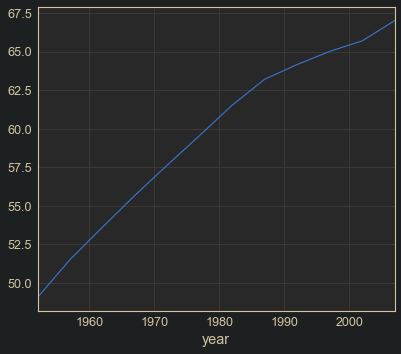

In [97]:
import matplotlib as plt
# matplotlib plot그래프 도식화

from jupyterthemes import jtplot

jtplot.style(theme='gruvboxd')

gyle.plot()

In [99]:
scientists=pd.read_csv("data/scientists.csv")
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [103]:
ages=scientists['Age']
ages.max()
#나이가 평균보다 큰 사람정보 출력
# scientists[ages>ages.mean()]
#나이가 평균보다 큰 나이만 출력
ages[ages>ages.mean()]


1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [108]:
# ages[[True,True,True,True,True,True,True,True,True,]]
ages # 나이벡터
# 요소끼리 덧셈 # 해당벡터 길이만큼 출력
ages+ages
ages+10

TypeError: 'int' object is not callable

In [110]:
# 인덱스 기준 내림차순 정렬
ages.sort_index(ascending=False)

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [111]:
ages.sort_values()

0    37
6    41
5    45
4    56
1    61
3    66
7    77
2    90
Name: Age, dtype: int64

In [112]:
scientists.dtypes

Name          object
Born          object
Died          object
Age            int64
Occupation    object
dtype: object

In [113]:
scientists['Born'].dtype

dtype('O')

In [116]:
bd=pd.to_datetime(scientists['Born'], format='%Y-%m-%d')
# 문자로 된데이터가 날짜형식으로 바뀐다
bd

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [123]:
scientists
# 파생변수
# scientists['age_days']=
dt=pd.to_datetime(scientists['Born'])-pd.to_datetime(scientists['Died']) # dpjf
dt


0   -13779 days
1   -22404 days
2   -32964 days
3   -24345 days
4   -20777 days
5   -16529 days
6   -15324 days
7   -28422 days
dtype: timedelta64[ns]

In [125]:
born_dt=pd.to_datetime(scientists['Born'],format="%Y-%m-%d")
died_dt=pd.to_datetime(scientists['Died'],format="%Y-%m-%d")
scientists['born_dt']=born_dt
scientists['born_dt']=born_dt
# scientists['born_dt'],scientists['died_dt']=(born_dt,died_dt)
scientists['age_days']=scientists['died_dt']-scientists['born_dt']
scientists


KeyError: 'died_dt'

In [126]:
scientists.columns
scientists.drop(['Age'],axis=1)

,Name,Born,Died,Occupation,born_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30


In [127]:
# 정규표현식
import seaborn as sns
anscombe = sns.load_dataset("anscombe")
anscombe



,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [129]:
dataset_1=anscombe[anscombe['dataset']=='I']
dataset_1

,dataset,x,y


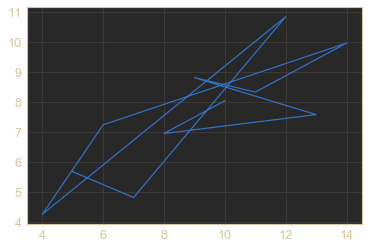

In [132]:
dataset_1=anscombe[anscombe['dataset']=='I']
dataset_2=anscombe[anscombe['dataset']=='II']
dataset_3=anscombe[anscombe['dataset']=='III']
dataset_4=anscombe[anscombe['dataset']=='IV']

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(dataset_1['x'], dataset_1['y'])

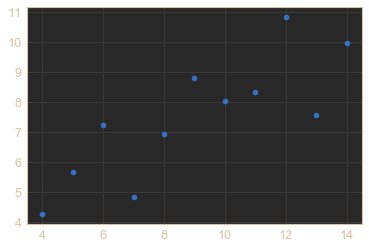

In [133]:
plt.plot(dataset_1['x'], dataset_1['y'],'o')

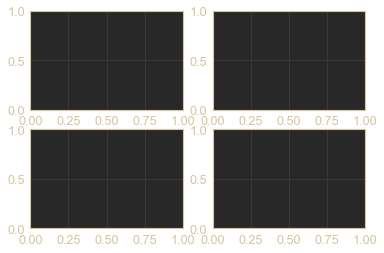

In [143]:
fig=plt.figure()
axes1=fig.add_subplot(2,2,1)
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)
axes4=fig.add_subplot(2,2,4)


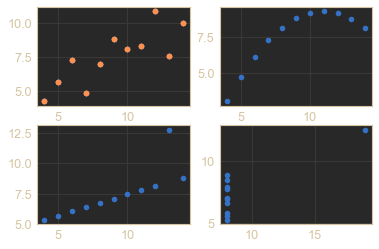

In [138]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')
fig

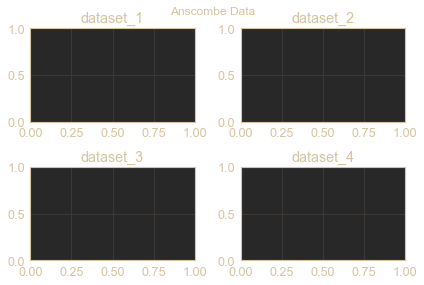

In [147]:
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")
fig.suptitle("Anscombe Data")
fig.tight_layout()
fig
